In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [4]:
data = pd.read_csv('Dataset1/dataset_1.csv', header=None, sep='\t');
data = data.values
X = data[:, 0:64]
y = data[:, 64]
# X = X[~np.all(X == 0.0, axis=1)].T          # remove all zero rows
print(X.shape)
print(y.shape)
print(np.unique(y))
X = normalize(X)


(537, 64)
(537,)
[0. 1. 2.]


In [3]:
def normalize(X):
    X_norm = X.copy()
    for i in range(X.shape[1]):
        if(np.std(X[:, i]) != 0):
            X_norm[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
    return X_norm

In [5]:
class LDA():
    def __init__(self) -> None:
        pass

    def fit(self,X,y, n_components):
        self.n_components = n_components
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        self.mean_vectors = []
        self.S_W = np.zeros((X.shape[1], X.shape[1]))
        self.S_B = np.zeros((X.shape[1], X.shape[1]))
        # S_W = np.cov(X.T)
        self.get_mean_vectors(X,y)
        self.get_sw(X, y)
        self.get_sb(X,y)
        
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(self.S_W).dot(self.S_B))
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
        eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse=True)
        self.w = np.hstack(list((eig_pairs[i][1].reshape(X.shape[1],1)) for i in range(self.n_components)))
        return self
    
    def get_mean_vectors(self,X,y):
        for i in range(self.n_classes):
            self.mean_vectors.append(np.mean(X[y==i], axis=0))

    def get_sw(self, X, y):
        for i in range(self.n_classes):
            self.S_W += np.cov(X[y==i].T)      #Covariance is a Feature*Feature matrix  

    def get_sb(self, X, y):
        for i in range(self.n_classes):
            n = X[y==i].shape[0]
            mean_diff = (self.mean_vectors[i] - np.mean(X, axis=0)).reshape(X.shape[1],1)
            self.S_B += n * (mean_diff).dot(mean_diff.T)


In [6]:
model = LDA()

model.fit(X,y,2)
X_lda = X.dot(model.w)
print(X_lda.shape)


(537, 2)


In [8]:
class my_PCA():
    def __init__(self,n_components) -> None:
        self.n_components = n_components
        pass

    def fit(self,X):
        #sklearn PCA
        pca = PCA(n_components=self.n_components)
        pca.fit(X)
        self.w = pca.components_
        return self
    
    def transform(self, X):
        return X.dot(self.w)

In [9]:
model2 = PCA(n_components=2)
model2.fit(X)
X_pca = model2.transform(X)
print(X_pca.shape)

(537, 2)


/home/aytien/.local/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


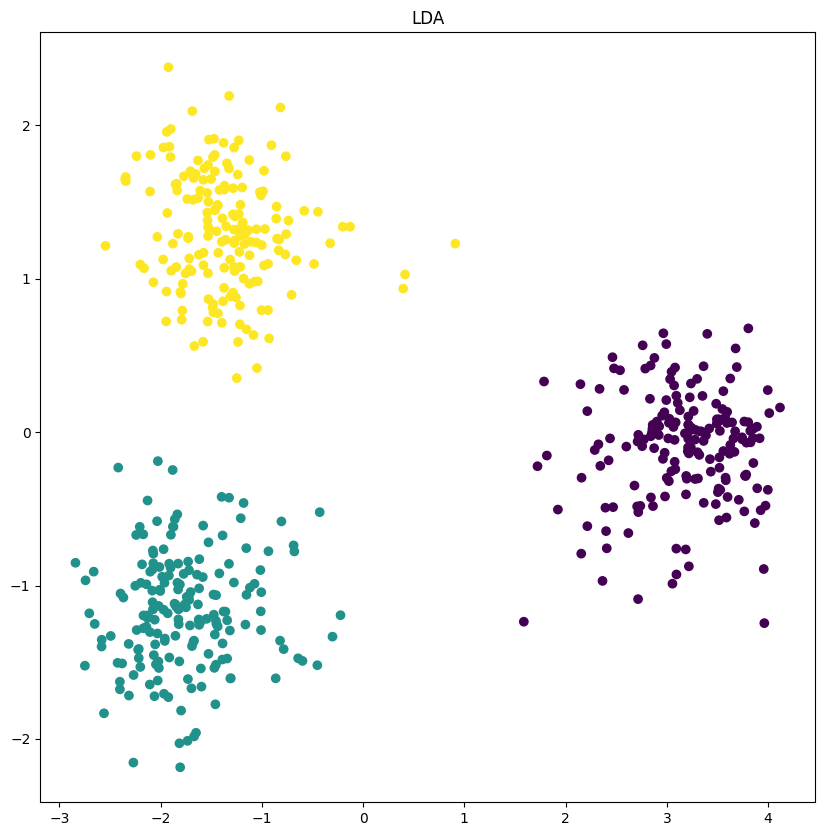

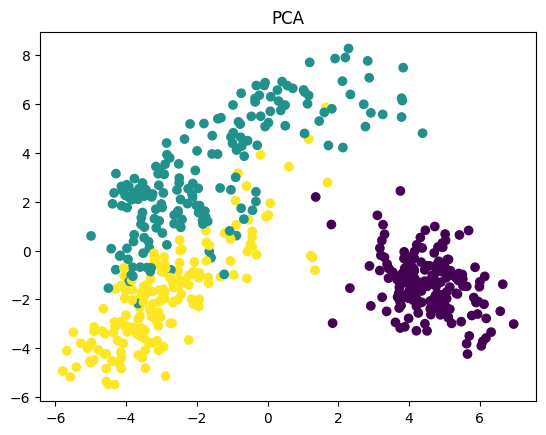

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y)
plt.title('LDA')
plt.show()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA')
plt.show()